In [36]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged = pd.merge(ride,city,on='city')
# Display the data table for preview


In [37]:
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

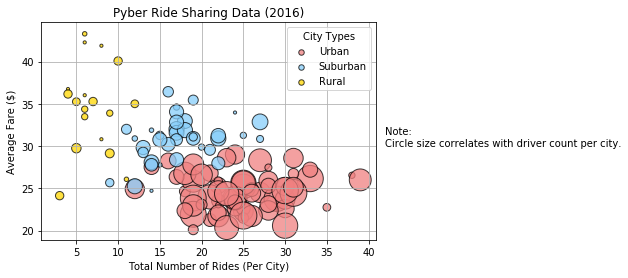

In [213]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
#type_of_city = merged.groupby('city')

rural = merged.loc[merged['type']=='Rural',:]
rural = rural.groupby('city')
count_of_ride = rural['ride_id'].count()
average_fare = rural['fare'].mean()
drivers_rural = city.loc[city['type']=='Rural']
driver_count = drivers_rural.groupby('city')['driver_count'].sum()

suburbs = merged.loc[merged['type']=='Suburban',:]
suburbs = suburbs.groupby('city')
count_of_sub_ride = suburbs['ride_id'].count()
average_sub_fare = suburbs['fare'].mean()
drivers_sub = city.loc[city['type']=='Suburban']
driver_sub_count = drivers_sub.groupby('city')['driver_count'].sum()

urban = merged.loc[merged['type']=='Urban',:]
urban = urban.groupby('city')
count_of_urb_ride = urban['ride_id'].count()
average_urb_fare = urban['fare'].mean()
drivers_urb = city.loc[city['type']=='Urban']
driver_urb_count = drivers_urb.groupby('city')['driver_count'].sum()

fig, ax = plt.subplots()
plt.scatter(count_of_urb_ride,average_urb_fare,s=driver_urb_count*10,c='lightcoral',edgecolors='black',alpha=.75, label='Urban')
plt.scatter(count_of_sub_ride,average_sub_fare,s=driver_sub_count*10,c='lightskyblue',edgecolors='black',alpha=.75, label='Suburban')
plt.scatter(count_of_ride,average_fare,s=driver_count*10,c='gold',edgecolors='black',alpha=.75, label='Rural')
lgnd = plt.legend(title='City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.text(42,30,'Note:\nCircle size correlates with driver count per city.')
plt.grid()
plt.savefig("Images/PyberRideSharingData.png")
plt.show()

## Total Fares by City Type

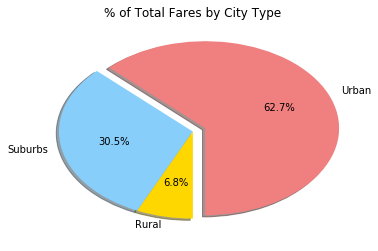

In [128]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure
grouped_by_city_type = merged.groupby('type')
fares_by_city = grouped_by_city_type['fare'].sum()
fares_by_city = fares_by_city.sort_values(ascending=False)
labels = ['Urban','Suburbs','Rural']
explode = (0.1,0,0)
colors = ["lightcoral", "lightskyblue",'gold']
plt.pie(fares_by_city, labels=labels, explode=explode,autopct="%1.1f%%",startangle=270,shadow=True,colors=colors)
plt.title('% of Total Fares by City Type')
plt.savefig("Images/TotalFares.png")
plt.show()

## Total Rides by City Type

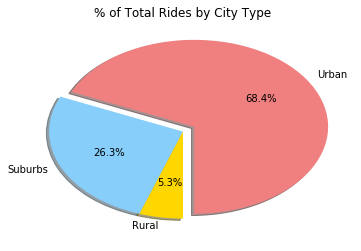

In [129]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

rides_by_city = grouped_by_city_type['ride_id'].count()
rides_by_city = rides_by_city.sort_values(ascending=False)
labels = ['Urban','Suburbs','Rural']
explode = (0.1,0,0)
colors = ["lightcoral", "lightskyblue",'gold']
plt.pie(rides_by_city, labels=labels, explode=explode,autopct="%1.1f%%",startangle=270,shadow=True,colors=colors)
plt.title('% of Total Rides by City Type')
plt.savefig("Images/TotalRides.png")
plt.show()

## Total Drivers by City Type

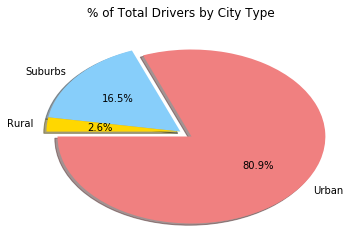

In [131]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
drivers = city.groupby('type')
drivers_by_city = drivers['driver_count'].sum()
drivers_by_city = drivers_by_city.sort_values(ascending=False)
labels = ['Urban','Suburbs','Rural']
explode = (0.1,0,0)
colors = ["lightcoral", "lightskyblue",'gold']
plt.pie(drivers_by_city, labels=labels, explode=explode,autopct="%1.1f%%",startangle=180,shadow=True,colors=colors)
plt.title('% of Total Drivers by City Type')
plt.savefig("Images/TotalDrivers.png")
plt.show()

## Data Analysis

* The average fare for Urban areas is lower than for Suburban and Rurual areas. The Urban areas have the most amount of drivers, so this is a likely reason why the fares are lower on average.
* The Urban drivers make up 80.9% of the total amount of drivers, while Urban rides only make up 68.4% of total rides. This means there is a higher supply than demand, which would confirm our theory of why average prices are lower in Urban areas. Conversely, Rural drivers only make up 2.6% of drivers, but account for 5.3% of rides. There is a higher demand for rides than there are drivers.
* There is a larger standard deviation in the average price for Rurual areas than the other two. This is likely due to a smaller sample size than the Urban and Suburban areas, but could potentially tell us that Rural rides are harder to predict on how far the person will need to go (greater variabilty in length of trips).